**Nama**         : Alfarabi

**Dataset**      : [Data Science Job Salaries 2024](https://www.kaggle.com/datasets/abhinavshaw09/data-science-job-salaries-2024?resource=download)

**Link Tableau** : https://public.tableau.com/app/profile/alfa.rabi/viz/AlfarabiMilestone1/DeskriptifdanInferensial?publish=yes

**Objektif**     : Melakukan analisa tentang job dan salary data science  pada tahun 2024

## Topik Permasalahan

Analisis Tentang Ketimpangan Gaji dalam Pekerjaan Data Science pada Tahun 2024

## Problem Statement

Dalam industri data science tahun 2024, terdapat ketidaksetaraan gaji antara berbagai posisi pekerjaan, yang menjadi permasalahan yang perlu ditangani secara serius. Fenomena ini mengundang pertanyaan tentang penyebab, dampak, dan solusi yang efektif. Faktor-faktor seperti tingkat pengalaman, jenis pekerjaan, dan lokasi geografis memainkan peran penting dalam menentukan kompensasi yang diterima oleh profesional data science. Perlu dipahami mengapa ketimpangan gaji terjadi di antara posisi-posisi tersebut, bagaimana hal ini mempengaruhi motivasi dan retensi karyawan, serta langkah-langkah apa yang dapat diambil untuk mencapai kesetaraan gaji yang lebih baik di seluruh spektrum pekerjaan data science. Dengan mengidentifikasi dan memahami akar masalah ini, akan lebih mudah untuk merancang strategi yang dapat menghasilkan perubahan positif bagi profesional data science dan industri secara keseluruhan.

## SMART

- Specific : Menetapkan target untuk mengurangi ketimpangan gaji antara posisi-posisi pekerjaan data science dengan memperhatikan faktor-faktor seperti pengalaman, keterampilan, dan tanggung jawab pekerjaan.

- Measurable : Melakukan evaluasi rutin terhadap data gaji untuk mengidentifikasi tren dan perubahan dalam ketimpangan gaji antara posisi-posisi pekerjaan data science, dan meminimalisir ketimpangan gaji hingga 10%.

- Achievable : Merancang strategi insentif dan kebijakan kompensasi yang memungkinkan untuk mengurangi ketimpangan gaji tanpa mengganggu stabilitas keuangan perusahaan.

- Relevant : Meningkatkan kepuasan dan motivasi karyawan data science, serta memperkuat citra perusahaan sebagai tempat kerja yang adil dan berkelanjutan.

- Time-bound : Mencapai tujuan ini dalam waktu satu tahun dengan memantau kemajuan secara berkala dan menyesuaikan strategi jika diperlukan untuk mencapai kesetaraan gaji yang diinginkan.

## Identification of Problems (5W + 1H)

- Dimana negara yang mempunyai rata-rata persentase salary terbesar dalam industri data science pada tahun 2024?
- Apakah company location mempengaruhi perbedaan salary dalam industri data science pada tahun 2024?
- Bagaimana pengaruh experience level terhadap ketimpangan salary di antara posisi-posisi pekerjaan dalam industri data science pada tahun 2024?
- Apakah terdapat ketidaksetaraan salary pada employment type dalam industri data science pada tahun 2024?
- Apa top 5 job title yang memiliki rata-rata salary tertinggi dalam industri data science pada tahun 2024?
- Tren work setting manakah yang paling diminati oleh employee dalam industri data science pada tahun 2024?

## Library

In [1]:
# Library yang dipakai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway

## A. Data Loading

In [2]:
# Menampilkan tabel dari file CSV
df = pd.read_csv('salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...,...,...
13967,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
13968,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
13969,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
13970,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
# Menampilkan nama kolom dari tabel
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
# Menampilkan unique value dari experience level
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [5]:
# Menampilkan unique value dari employment type
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [6]:
# Menampilkan unique value dari remote ratio
df.remote_ratio.unique()

array([  0, 100,  50], dtype=int64)

In [7]:
# Menampilkan unique value dari company location
df.company_location.unique()

array(['AE', 'US', 'AU', 'UA', 'LT', 'CA', 'GB', 'NL', 'EG', 'AT', 'DE',
       'ES', 'PH', 'FI', 'TR', 'CH', 'OM', 'NZ', 'FR', 'MX', 'PT', 'BA',
       'BR', 'AR', 'LV', 'ZA', 'IT', 'AS', 'IE', 'EE', 'IN', 'MT', 'HU',
       'LB', 'RO', 'VN', 'NG', 'PL', 'LU', 'GI', 'CO', 'SI', 'GR', 'MU',
       'RU', 'KR', 'CZ', 'QA', 'KE', 'DK', 'GH', 'SE', 'AD', 'EC', 'IL',
       'SA', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

## B. Data Cleaning

#### - Menghapus Kolom

In [8]:
# Menghapus baris yang sama
df = df.drop_duplicates()

In [9]:
# Mengahapus kolom
df = df.drop(columns=['salary', 'salary_currency'])

In [10]:
# Menampilkan 5 baris teratas
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,AU,0,AU,M


In [11]:
# Menampilkan nama kolom
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

#### - Mengisi Missing Value

In [12]:
# Mengecek jumlah missing value
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### - Penyesuaian Tipe Data

In [13]:
# Melihat data type
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [14]:
# Menyimpan data yang sudah dicleaning
df.to_csv('salaries_cleaning.csv', index=False)

## C. Analysis and Calculations

In [15]:
# Menampilkan data yang sudah dicleaning
data = pd.read_csv('salaries_cleaning.csv')

data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...
8589,2020,SE,FT,Data Scientist,412000,US,100,US,L
8590,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
8591,2020,EN,FT,Data Scientist,105000,US,100,US,S
8592,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


- **Statistik Deskriptif**

In [16]:
# Hitung rata-rata salary
mean_salary = data['salary_in_usd'].mean()
print("Mean salary: ", mean_salary)

# Hitung median salary
median_salary = data['salary_in_usd'].median()
print("Median salary: ", median_salary)

# Hitung mode salary
mode_salary = data['salary_in_usd'].mode()
print("Mode salary: ", mode_salary)

Mean salary:  146745.2243425646
Median salary:  138750.0
Mode salary:  0    150000
Name: salary_in_usd, dtype: int64


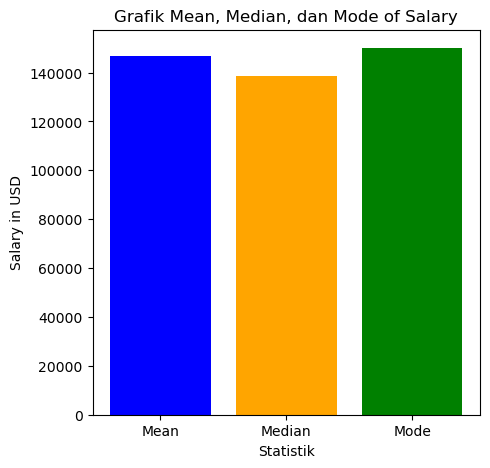

In [17]:
# Data
categories = ['Mean', 'Median', 'Mode']
values = [mean_salary, median_salary, mode_salary[0]]  # Ambil mode pertama karena mode() mengembalikan Series

# Membuat bar chart
plt.figure(figsize=(5, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Grafik Mean, Median, dan Mode of Salary')
plt.xlabel('Statistik')
plt.ylabel('Salary in USD')

# Menampilkan plot
plt.show()

Dari data yang diberikan, kita dapat membuat hasil analisis sebagai berikut:

Rata-rata Gaji `(Mean Salary)`:
Rata-rata gaji dari data tersebut adalah sekitar **$146,745.22.**

Median Gaji `(Median Salary)`:
Median gaji dari data tersebut adalah sebesar **$138,750.00.**

Modus Gaji `(Mode Salary)`:
Modus (nilai yang paling sering muncul) dari data gaji adalah **$150,000.00.**

Hasil analisis ini memberikan gambaran tentang sentralitas atau pusat distribusi dari data gaji yang diberikan, dengan menunjukkan nilai rata-rata, median, dan modus gaji.

- **Statistik Inferensial**

- Bagaimana pengaruh experience level terhadap ketimpangan salary di antara posisi-posisi pekerjaan dalam industri data science pada tahun 2024?

In [18]:
# Mengelompokan dan menghitung mean, standar deviasi, dan confidence interval pada Junior
junior_salary = data[data['experience_level'] == 'EN']['salary_in_usd']
mean_junior = np.mean(junior_salary)
std_junior = np.std(junior_salary)
conf_int_junior = stats.norm.interval(0.95, loc=mean_junior, scale=std_junior/np.sqrt(len(junior_salary)))
print("Confidence interval untuk rata-rata gaji Junior:", conf_int_junior)

# Mengelompokan dan menghitung mean, standar deviasi, dan confidence interval pada Intermediate
intermediate_salary = data[data['experience_level'] == 'MI']['salary_in_usd']
mean_intermediate = np.mean(intermediate_salary)
std_intermediate = np.std(intermediate_salary)
conf_int_intermediate = stats.norm.interval(0.95, loc=mean_intermediate, scale=std_intermediate/np.sqrt(len(intermediate_salary)))
print("Confidence interval untuk rata-rata gaji Intermediate:", conf_int_intermediate)

# Mengelompokan dan menghitung mean, standar deviasi, dan confidence interval pada Expert
expert_salary = data[data['experience_level'] == 'SE']['salary_in_usd']
mean_expert = np.mean(expert_salary)
std_expert = np.std(expert_salary)
conf_int_expert = stats.norm.interval(0.95, loc=mean_expert, scale=std_expert/np.sqrt(len(expert_salary)))
print("Confidence interval untuk rata-rata gaji Expert:", conf_int_expert)

# Mengelompokan dan menghitung mean, standar deviasi, dan confidence interval pada Director
director_salary = data[data['experience_level'] == 'EX']['salary_in_usd']
mean_director = np.mean(director_salary)
std_director = np.std(director_salary)
conf_int_director = stats.norm.interval(0.95, loc=mean_director, scale=std_director/np.sqrt(len(director_salary)))
print("Confidence interval untuk rata-rata gaji Director:", conf_int_director)

Confidence interval untuk rata-rata gaji Junior: (85485.39036409701, 93054.68655897993)
Confidence interval untuk rata-rata gaji Intermediate: (120252.06106877595, 126146.75426223449)
Confidence interval untuk rata-rata gaji Expert: (161438.23755320854, 165128.28411861806)
Confidence interval untuk rata-rata gaji Director: (184826.08300983408, 200748.45402720294)


Hasil analisis dari data diatas menunjukkan confidence interval untuk rata-rata gaji pada berbagai tingkatan pengalaman dalam pekerjaan Data Science. Berikut adalah hasil analisisnya:

- `Junior:` Confidence interval untuk rata-rata gaji entry-level adalah antara **$85,485.39** dan **$93,054.69.**

- `Intermediate:` Confidence interval untuk rata-rata gaji mid-level adalah antara **$120,252.06** dan **$126,146.75.**

- `Expert:` Confidence interval untuk rata-rata gaji senior adalah antara **$161,438.24** dan **$165,128.28.**

- `Director:` Confidence interval untuk rata-rata gaji executive adalah antara **$184,826.08** dan **$200,748.45.**

Dengan menggunakan confidence interval, kita dapat mengestimasi rentang nilai di mana rata-rata gaji sebenarnya mungkin berada dengan tingkat kepercayaan 95%. informasi ini berguna untuk memahami distribusi gaji pada berbagai tingkatan pengalaman dalam pekerjaan Data Science.

- **Hypotestis Testing**

Saya menggunakan metode `f_oneway` dari pustaka `scipy.stats` untuk melakukan analisis uji `ANOVA`. Hasil uji ini akan memberikan nilai `F-statistic` dan `p-value`. Jika nilai `p-value` lebih rendah dari tingkat signifikansi yang ditetapkan biasanya 0,05, itu menunjukkan adanya perbedaan yang signifikan antara rata-rata gaji di antara berbagai kelompok experience level.

- **H0**: Tidak ada perbedaan signifikan dalam rata-rata gaji antara kelompok eperience level (Junior, Intermediate, Expert, Director).

- **H1**: Ada perbedaan signifikan dalam rata-rata gaji antara setidaknya dua kelompok experience level.

In [19]:
# Data
junior_salary = data[data['experience_level'] == 'EN']['salary_in_usd']
intermediate_salary = data[data['experience_level'] == 'MI']['salary_in_usd']
expert_salary = data[data['experience_level'] == 'SE']['salary_in_usd']
director_salary = data[data['experience_level'] == 'EX']['salary_in_usd']

# Uji ANOVA
f_statistic, p_value = f_oneway(junior_salary, intermediate_salary, expert_salary, director_salary)

print("Nilai F-statistic:", f_statistic)
print("Nilai p-value:", p_value)

Nilai F-statistic: 434.8577331524446
Nilai p-value: 5.007074038557751e-263


Dari data yang diberikan, hasil analisis uji statistik menunjukkan:

`Nilai F-Statistic:`
Nilai F-Statistic adalah **434.8577331524446.** Semakin besar nilai F-Statistic, semakin signifikan perbedaan antara experience level tersebut.

`Nilai p-value:`
Nilai p-value sangat rendah, sebesar **5.007074038557751e-263**. Hal ini menunjukkan bahwa terdapat perbedaan yang sangat signifikan antara experience level. Dengan demikian, kita menolak hipotesis nol bahwa tidak ada perbedaan antara kelompok-kelompok tersebut.

Hasil analisis ini memberikan indikasi kuat bahwa terdapat perbedaan yang signifikan antara experience level dalam data tersebut.

- **Visualisasi Data**

Pertama saya akan membuat Upper salary dan Lower salary dengan 10% dari rata-rata.

c:\Users\Alfarabi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


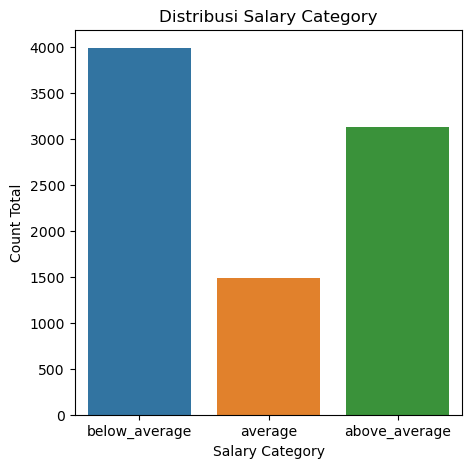

In [25]:
# Menghitung rata-rata salary
average_salary = data['salary_in_usd'].mean()

# Menentukan threshold untuk upper_salary dan lower_salary 
threshold = 0.1 * average_salary # (misal: 10% dari rata-rata)

# Menghitung upper_salary, average_salary, dan lower_salary
upper_salary = average_salary + threshold
lower_salary = average_salary - threshold

# Menambahkan kolom 'salary_category' berdasarkan kondisi
data['salary_category'] = pd.cut(data['salary_in_usd'], bins=[-np.inf, lower_salary, upper_salary, np.inf], labels=['below_average', 'average', 'above_average'])

# Plotting
plt.figure(figsize=(5, 5))
sns.countplot(x='salary_category', data=data, order=['below_average', 'average', 'above_average'])
plt.title('Distribusi Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Count Total')
plt.show()


Hasil analisis data diatas, menunjukan bahwa karyawan yang mendapatkan salary below average atau yang dibawah rata-rata masih lebih banyak dibandingkan dengan yang lainnya.

- Negara yang mempunyai rata-rata persentase salary terbesar.

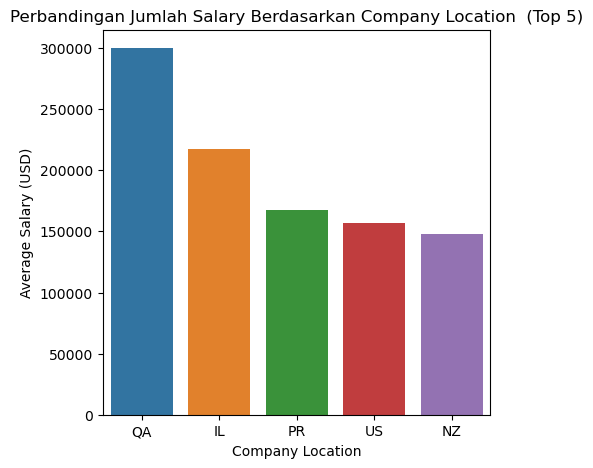

In [21]:
# Melakukan grouping dan perhitungan rata-rata salary berdasarkan lokasi company
avg_salary_by_location = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(5, 5))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location.values)
plt.title('Perbandingan Jumlah Salary Berdasarkan Company Location  (Top 5)')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.show()

Hasil analisis dari data berikut menunjukan bahwa terjadi gap rata-rata yang cukup jauh salary antara negara Qatar dengan negara yang lainnya.

- Melihat ketidaksetaraan salary pada employment type.

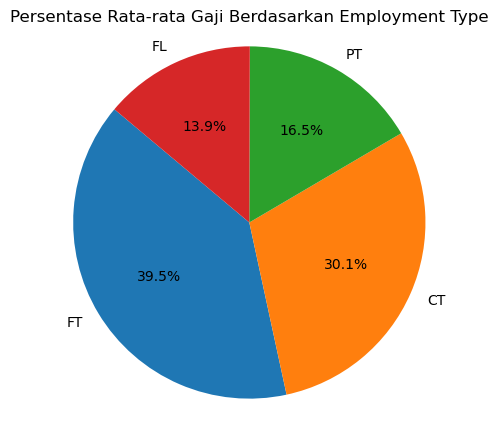

In [22]:
# Data
employment_types = data['employment_type'].unique()

# Menginisialisasi dictionary untuk menyimpan rata-rata gaji setiap employment type
mean_salaries = {}

# Menghitung rata-rata gaji untuk setiap employment type dan menyimpannya dalam dictionary
for employment_type in employment_types:
    salary = data[data['employment_type'] == employment_type]['salary_in_usd']
    mean_salaries[employment_type] = salary.mean()

# Uji ANOVA untuk menguji perbedaan signifikan antara rata-rata gaji employment type
f_statistic, p_value = f_oneway(*[data[data['employment_type'] == et]['salary_in_usd'] for et in employment_types])

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(mean_salaries.values(), labels=mean_salaries.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Persentase Rata-rata Gaji Berdasarkan Employment Type')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

Hasil analisis dari data diatas menunjujukan bahwa FT memiliki nilai 39.5%, CT memiliki nilai 30.1%, PT memiliki nilai 16.5%, FL memiliki nilai 13.9% . Dengan begitu terdapat ketidaksetaraan diantara employment type.

- Apa top 5 job title yang memiliki rata-rata salary tertinggi.

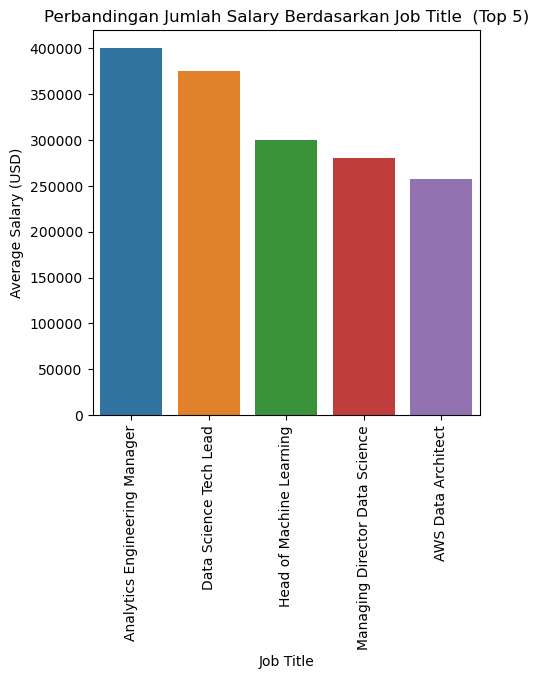

In [23]:
# Melakukan grouping dan perhitungan rata-rata salary berdasarkan job title
avg_salary_by_job_title = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(5, 5))
sns.barplot(x=avg_salary_by_job_title.index, y=avg_salary_by_job_title.values)
plt.title('Perbandingan Jumlah Salary Berdasarkan Job Title  (Top 5)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.show()

Hasil analisis diatas menunjukan bahwa top 5 salary terbesar diantara job title yaitu Analitics Engineering Manager, Data Science Tech Lead, Head of Machine Learning, Managing Director Data Science, dan AWS Data Architect.

- Tren work setting yang paling diminati oleh employee.

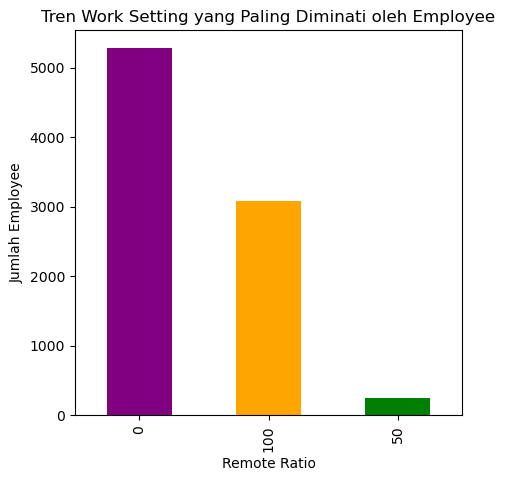

In [24]:
# Data work setting
work_setting_counts = data['remote_ratio'].value_counts()

# Plotting bar chart
plt.figure(figsize=(5, 5))
work_setting_counts.plot(kind='bar', color=['purple', 'orange', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Tren Work Setting yang Paling Diminati oleh Employee')
plt.xlabel('Remote Ratio')
plt.ylabel('Jumlah Employee')

# Menampilkan plot
plt.show()


Hasil Analisis data diatas Tren Work Setting yang paling diminati yaitu No remote work diikuti oleh Fully remote dan terakhir Partially remote.

## D. Conclusion

Kesimpulan dari hasil analisis data:

1. `Negara yang mempunyai rata-rata persentase salary terbesar:` Qatar menjadi negara yang memiliki persentase salary terbesar, sehingga dapat disimpulkan bahwa rata-rata gaji karyawan di Qatar lebih tinggi diantara negara lain.

2. `Company location mempengaruhi perbedaan salary:` Terjadi gap rata-rata salary yang cukup jauh antara Qatar dengan Illinois dan yang lainnya, yang menunjukan bahwa company location merupakan faktor terjadinya perbedaan salary.

3. `Dampak experience level terhadap perbedaan salary:` Ada pengaruh yang signifikan dari tingkat pengalaman terhadap gaji. Analisis menggunakan confidence interval menunjukkan bahwa rata-rata gaji untuk tingkat pengalaman junior, intermediate, expert, dan director memiliki perbedaan yang signifikan.

4. `Perbedaan salary antara employment type:` Perbedaan salary antar employment type terlihat sangat jelas dengan rata-rata salary tertinggi terdapat pada FT dengan nilai 39.5% dan rata-rata salary terendahnya terdapat pada FL dengan nilai 13.9%.

5. `Top 5 job title yang memiliki rata-rata salary tertinggi:` Analitics Engineering Manager menjadi urutan pertama rata-rata salary yang paling tinggi, dan diikuti dengan Data Science Tech Lead, selanjutnya diikuti Head of Machine Learning, lalu selanjutnya adalah Managing Director Data Science, dan yang urutan kelima ialah AWS Data Architect.

6. `Tren work setting paling banyak diminati:` Tren work setting yang paling banyak diminati ialah No remote work dan yang paling kurang diminati ialah partially remote.

**Oleh karena itu, berdasarkan analisis yang telah dilakukan, saya menyarankan agar perusahaan mempertimbangkan aspek-aspek seperti lokasi, tingkat pengalaman, jenis karyawan, dan jabatan dalam merancang kebijakan gaji dan strategi sumber daya manusia untuk meningkatkan kesejahteraan karyawan dan kinerja keseluruhan perusahaan.**
